<a href="https://colab.research.google.com/github/EjbejaranosAI/DL/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install necesary packages

In [2]:
!pip install -q pandas
!pip install -q tensorflow
!pip install -q opencv-python
!pip install -q scikit-learn
!pip install -q wandb
!wandb login

     |████████████████████████████████| 1.9 MB 4.5 MB/s 
     |████████████████████████████████| 168 kB 86.6 MB/s 
     |████████████████████████████████| 182 kB 83.4 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 168 kB 94.0 MB/s 
     |████████████████████████████████| 166 kB 91.3 MB/s 
     |████████████████████████████████| 166 kB 90.2 MB/s 
     |████████████████████████████████| 162 kB 90.1 MB/s 
     |████████████████████████████████| 162 kB 94.0 MB/s 
     |████████████████████████████████| 158 kB 96.0 MB/s 
     |████████████████████████████████| 157 kB 98.1 MB/s 
     |████████████████████████████████| 157 kB 102.8 MB/s 
     |████████████████████████████████| 157 kB 97.7 MB/s 
     |████████████████████████████████| 157 kB 105.4 MB/s 
     |████████████████████████████████| 157 kB 106.4 MB/s 
     |████████████████████████████████| 157 kB 100.6 MB/s 
     |████████████████████████████████| 157 kB 102.8 MB/s 
     |██████

# Download data

In [ ]:
# Download dataset 256x256 
!curl -o /content/drive/MyDrive/Colab_Notebooks_upc/5_DL/Delivery_2/MAMe_data_256.zip https://storage.hpai.bsc.es/mame-dataset/MAMe_data_256.zip
# Download labels 
!curl -o /content/drive/MyDrive/Colab_Notebooks_upc/5_DL/Delivery_2/MAMe_metadata.zip https://storage.hpai.bsc.es/mame-dataset/MAMe_metadata.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  689M  100  689M    0     0  20.0M      0  0:00:34  0:00:34 --:--:-- 22.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  848k  100  848k    0     0   579k      0  0:00:01  0:00:01 --:--:--  579k


In [ ]:
# Download dataset High-Resolution
#!curl -o /content/drive/MyDrive/Colab_Notebooks_upc/5_DL/Delivery_2/MAMe_data.zip https://storage.hpai.bsc.es/mame-dataset/MAMe_data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0  205G    0  869M    0     0  20.6M      0  2:49:13  0:00:42  2:48:31 23.7M^C


# Get GPU information

In [44]:
!nvidia-smi

Thu Dec  1 17:53:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    51W / 400W |   9700MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Extract data

In [4]:
# Get data
!cp /content/drive/MyDrive/Colab_Notebooks_upc/5_DL/Delivery_2/MAMe_data_256.zip .
!cp /content/drive/MyDrive/Colab_Notebooks_upc/5_DL/Delivery_2/MAMe_metadata.zip .

!unzip /content/MAMe_metadata.zip
!rm MAMe_metadata.zip

!unzip /content/MAMe_data_256.zip
!rm MAMe_data_256.zip

Streaming output truncated to the last 5000 lines.
  inflating: data_256/623457.jpg     
  inflating: data_256/6235.jpg       
  inflating: data_256/62359.jpg      
  inflating: data_256/6236.jpg       
  inflating: data_256/623604.jpg     
  inflating: data_256/623605.jpg     
  inflating: data_256/623606.jpg     
  inflating: data_256/623607.jpg     
  inflating: data_256/623608.jpg     
  inflating: data_256/623621.jpg     
  inflating: data_256/6237.jpg       
  inflating: data_256/62371.jpg      
  inflating: data_256/623838.jpg     
  inflating: data_256/623930.jpg     
  inflating: data_256/623943.jpg     
  inflating: data_256/624058.jpg     
  inflating: data_256/624244.jpg     
  inflating: data_256/624248.jpg     
  inflating: data_256/624275.jpg     
  inflating: data_256/624291.jpg     
  inflating: data_256/62465.jpg      
  inflating: data_256/625281.jpg     
  inflating: data_256/625291.jpg     
  inflating: data_256/625297.jpg     
  inflating: data_256/625299.jpg     

# Import Libraries

```
# api_key = 190989b8377e79d615c691b45c63d5fcc4e5b29f 
```

In [54]:
import os
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
import random

import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.rcsetup import validate_sketch

import tensorflow
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import Sequence

from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import wandb
from wandb.keras import WandbCallback

# Helper functions

In [55]:
# Dataloader
class Mame_dataloader(tf.keras.utils.Sequence):
  def __init__(self, df, x_col, y_col=None, batch_size=32, num_classes=None,shape = (224, 224), shuffle=True):
    self.batch_size = batch_size
    self.df = df
    self.indices = self.df.index.tolist()
    self.num_classes = num_classes
    self.shuffle = shuffle
    self.x_col = x_col
    self.y_col = y_col
    self.shape = shape
    self.on_epoch_end()
    

  def __len__(self):
    return len(self.indices) // self.batch_size

  def __getitem__(self, index):
    index = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
    X, y = self.__get_data(index)
    return X, y

  def on_epoch_end(self):
    if self.shuffle == True:
      np.random.shuffle(self.indices) 

  def __get_data(self, index):
        
    X = []
    y = []
    
    img_batch = self.x_col[index].tolist()
    label_batch = self.y_col[index].tolist()
    dim = self.shape
    
    for img_name, label in zip(img_batch, label_batch):
        img = cv2.imread(img_name) / 255
        img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        label = int(label)
        lb = np.zeros(self.num_classes)
        lb[label] = 1

        X.append(img)
        y.append(lb)
    X = np.array(X)
    
    return X, np.array(y)

In [56]:
def preprocessing_metadata(path_metadata, path_data, path_labels):
  print("")
  print("------------------Starting with pre-processing--------------------")
  print("")
        
  df = pd.read_csv(path_metadata)
  df['path'] = path_data
  df['path image'] = df['path'] + df['Image file']

  label_dataframe = pd.read_csv(path_labels)
  label_dataframe.head()

  header = ['target', 'label']
  label_dataframe.loc[-1] = label_dataframe.columns
  label_dataframe.columns = header
  #labels.sort_values('target',ascending=False)
  label_dataframe = label_dataframe.reset_index(drop=True)
  # Remove blank spaces
  label_dataframe['label'] = label_dataframe['label'].str.strip()
  label_dataframe.head()

  #Replace Medium names by labels 
  labels = label_dataframe['label'].values
  new_labels = label_dataframe['target'].values

  labels_dict = dict(zip(labels, new_labels))
  df['Medium'] = df['Medium'].str.strip()
  df['Medium'] = df.loc[:,'Medium'].replace(labels_dict) 
  print(df.head())
  print("")
  print("------------------Pre-processing finished--------------------")
  print("")    
  
  
  return df

def samplesByClass(dataframe,num_to_see:int):
  print("")
  print("-----------------Dataframe grouped by Medium class--------------------")
  print("")
  dataframe['count'] = 1
  num_by_class = dataframe.groupby('Medium').sum().reset_index()
  num = num_by_class.head(num_to_see)
  print(num.head())
  print("")
  return num


# Get the number of samples by subset
def subsetByClass(df):
  print("")
  print("-----------------Dataframe grouped by Subset class--------------------")
  print("")
  subset_by_class = df.groupby('Subset').sum().reset_index()
  print(subset_by_class.head())
  print("")

# Split dataframe in each subset
def split_dataframe_subset(df_metadata):

  train = df_metadata[df_metadata['Subset'] == 'train']
  test = df_metadata[df_metadata['Subset'] == 'test']
  validation = df_metadata[df_metadata['Subset'] == 'val']
  
  return train, test, validation

def get_list_subsets(subset_dataframe,name_subset):
    x_values = list(subset_dataframe['path image'])
    y_values = list(subset_dataframe['Medium'])
    num_x_images = len(x_values)
    num_y_labels = len(y_values)
    
    print(f'{name_subset} -------> Number of sample images {num_x_images} with its corresponded {num_y_labels} labels ')
    
    return x_values, y_values

# Pre-processing data

In [66]:
path_data = '/content/data_256/'
path_toy_data = '/content/MAMe_toy_dataset.csv'
path_labels = '/content/MAMe_labels.csv'
path_metadata = '/content/MAMe_dataset.csv'

# Generate dataframe with data ready to create subset list
df_metadata = preprocessing_metadata(path_metadata,path_data, path_labels)   
# Get the number of samples by medium class
samplesByClass(df_metadata, 29)

# Get the number of samples by subset class
subsetByClass(df_metadata)

# Generate dataframe for each subset
train, test, val = split_dataframe_subset(df_metadata)

#Generate list with the images and labels for each subset
X_train, Y_train = get_list_subsets(train, "Train")
X_val, Y_val = get_list_subsets(val, "Validation")
X_test, Y_test = get_list_subsets(test, "Test")

# Verify if all the images have the same size
#check_image_size(X_train,X_test, X_val)

trainDataloader =  Mame_dataloader(train,train['path image'],train['Medium'],batch_size=32,num_classes=29)
val_Dataloader =  Mame_dataloader(val,val['path image'],val['Medium'],batch_size=32,num_classes=29)
test_Dataloader =  Mame_dataloader(test,test['path image'],test['Medium'],batch_size=32,num_classes=29)

print(f'It was generated {trainDataloader.__len__()} steps in an epoch')
print(f'It was generated {val_Dataloader.__len__()} steps in an epoch')
print(f'It was generated {test_Dataloader.__len__()} steps in an epoch')



------------------Starting with pre-processing--------------------

   Image file Medium                      Museum Museum-based instance ID  \
0  436018.jpg     17  Metropolitan Museum of Art                29.100.60   
1   11779.jpg     17  Metropolitan Museum of Art                 1982.373   
2   19022.jpg     17  Metropolitan Museum of Art                 2006.418   
3  435883.jpg     17  Metropolitan Museum of Art                 61.101.3   
4   10481.jpg     17  Metropolitan Museum of Art                    09.95   

  Subset   Width  Height  Product size  Aspect ratio                path  \
0  train  3144.0  3840.0    12072960.0        0.8187  /content/data_256/   
1  train  1707.0  2136.0     3646152.0        0.7992  /content/data_256/   
2  train  2845.0  3811.0    10842295.0        0.7465  /content/data_256/   
3  train  3811.0  2916.0    11112876.0        1.3069  /content/data_256/   
4  train  3811.0  2099.0     7999289.0        1.8156  /content/data_256/   

           

In [67]:
train['Medium'] = train['Medium'].astype('string')
val['Medium'] = val['Medium'].astype('string')
test['Medium'] = test['Medium'].astype('string')

<ipython-input-67-fabfab26a774>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Medium'] = train['Medium'].astype('string')
<ipython-input-67-fabfab26a774>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['Medium'] = val['Medium'].astype('string')
<ipython-input-67-fabfab26a774>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [68]:
def custom_augmentation(np_tensor):
 
  def random_contrast(np_tensor):
    return tf.image.random_contrast(np_tensor, 0.5, 2)
  
  augmnted_tensor = random_contrast(np_tensor)
  return np.array(augmnted_tensor)


traindatagen = ImageDataGenerator(
    rescale = 1/ 255.0,
    horizontal_flip=True,
    vertical_flip=True,
    #rotation_range=45,
)

datagen = ImageDataGenerator(
    rescale = 1/ 255.0,
)

train_generator = traindatagen.flow_from_dataframe(
    dataframe= train,
    directory= "data_256",
    x_col='Image file',
    y_col='Medium',
    shuffle=True,
    class_mode='categorical',
    batch_size=32,
    target_size=(224,224)
)

val_generator = traindatagen.flow_from_dataframe(
    dataframe= val,
    directory= "data_256",
    x_col='Image file',
    y_col='Medium',
    class_mode='categorical',
    shuffle=True,
    batch_size=32,
    target_size=(224,224)
)


test_generator = datagen.flow_from_dataframe(
    dataframe= test,
    directory= "data_256",
    x_col='Image file',
    y_col='Medium',
    class_mode='categorical',
    shuffle=False,
    batch_size=32,
    target_size=(224,224)
)

Found 20300 validated image filenames belonging to 29 classes.
Found 1450 validated image filenames belonging to 29 classes.
Found 15657 validated image filenames belonging to 29 classes.


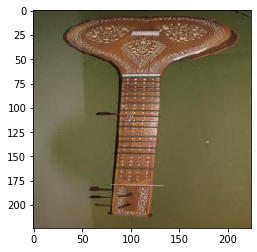

In [69]:
plt.imshow(train_generator.__getitem__(0)[0][9])

# Baseline

In [ ]:
#INITIALIZE EXPERIMENT
wandb.init(project="DL-MAMe-experiments")
#Imput for parameters
config = wandb.config
config.batch_size = 32
config.learning_rate = 0.0001

# VGG16 MODEL
input_shape = (224, 224, 3)
## Loading VGG16 model
vgg16_model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
vgg16_model.trainable = False ## Not trainable weights
vgg16_model.summary()

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(512, activation='relu')
dense_layer_2 = layers.Dense(512, activation='relu')
dropout_layer1 = tf.keras.layers.Dropout(0.2)
prediction_layer = layers.Dense(29, activation='softmax')


Model_VGG16 = models.Sequential([
    vgg16_model,
    flatten_layer,
    dense_layer_1,
    dropout_layer1,
    dense_layer_2,
    prediction_layer
])
Model_VGG16.summary()

tf.keras.backend.clear_session()

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.2)

lr_decayed_fn = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate = 0.001, decay_steps= 500)

#opt = keras.optimizers.Adam(learning_rate=lr_decayed_fn)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)
#opt = keras.optimizers.Adam(learning_rate=0.0001)


config.optimizer = opt
config.epochs = 20
config.num_classes = 29

wandb_callback = wandb.keras.WandbCallback(log_weights=True)

Model_VGG16.compile(
    optimizer=opt,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=8,  restore_best_weights=True)

history_vgg16_1dl = Model_VGG16.fit(train_generator, epochs=config.epochs, validation_data=val_generator, callbacks=[es, wandb_callback])

# Store model 
Model_VGG16.save(os.path.join(wandb.run.dir,"./models/model"+str(config.epochs)+str(config.batch_size)+str(config.learning_rate)+"_E8_vgg16.h5"))
# Close the W&B run.
wandb.finish()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

wandb: Adding directory to artifact (/content/wandb/run-20221201_150552-c5lsbwix/files/model-best)... Done. 1.3s


635/635 [==============================] - 50s 78ms/step - loss: 2.0318 - accuracy: 0.3810 - val_loss: 1.5695 - val_accuracy: 0.4903
Epoch 2/20
635/635 [==============================] - ETA: 0s - loss: 1.5138 - accuracy: 0.5150

wandb: Adding directory to artifact (/content/wandb/run-20221201_150552-c5lsbwix/files/model-best)... Done. 1.3s


635/635 [==============================] - 50s 78ms/step - loss: 1.5138 - accuracy: 0.5150 - val_loss: 1.3873 - val_accuracy: 0.5372
Epoch 3/20
635/635 [==============================] - ETA: 0s - loss: 1.3191 - accuracy: 0.5694

wandb: Adding directory to artifact (/content/wandb/run-20221201_150552-c5lsbwix/files/model-best)... Done. 1.2s


635/635 [==============================] - 49s 77ms/step - loss: 1.3191 - accuracy: 0.5694 - val_loss: 1.2636 - val_accuracy: 0.5766
Epoch 4/20
635/635 [==============================] - ETA: 0s - loss: 1.2032 - accuracy: 0.6036

wandb: Adding directory to artifact (/content/wandb/run-20221201_150552-c5lsbwix/files/model-best)... Done. 1.3s


635/635 [==============================] - 50s 78ms/step - loss: 1.2032 - accuracy: 0.6036 - val_loss: 1.2005 - val_accuracy: 0.6090
Epoch 5/20
635/635 [==============================] - ETA: 0s - loss: 1.1044 - accuracy: 0.6373

wandb: Adding directory to artifact (/content/wandb/run-20221201_150552-c5lsbwix/files/model-best)... Done. 1.3s


635/635 [==============================] - 49s 78ms/step - loss: 1.1044 - accuracy: 0.6373 - val_loss: 1.1331 - val_accuracy: 0.6186
Epoch 6/20
635/635 [==============================] - ETA: 0s - loss: 1.0190 - accuracy: 0.6624

wandb: Adding directory to artifact (/content/wandb/run-20221201_150552-c5lsbwix/files/model-best)... Done. 1.3s


635/635 [==============================] - 49s 77ms/step - loss: 1.0190 - accuracy: 0.6624 - val_loss: 1.0897 - val_accuracy: 0.6497
Epoch 7/20
635/635 [==============================] - 45s 71ms/step - loss: 0.9517 - accuracy: 0.6829 - val_loss: 1.0983 - val_accuracy: 0.6428
Epoch 8/20
635/635 [==============================] - ETA: 0s - loss: 0.8915 - accuracy: 0.7027

wandb: Adding directory to artifact (/content/wandb/run-20221201_150552-c5lsbwix/files/model-best)... Done. 1.2s


635/635 [==============================] - 49s 78ms/step - loss: 0.8915 - accuracy: 0.7027 - val_loss: 1.0581 - val_accuracy: 0.6559
Epoch 9/20
635/635 [==============================] - ETA: 0s - loss: 0.8441 - accuracy: 0.7125

wandb: Adding directory to artifact (/content/wandb/run-20221201_150552-c5lsbwix/files/model-best)... Done. 1.2s


635/635 [==============================] - 49s 77ms/step - loss: 0.8441 - accuracy: 0.7125 - val_loss: 1.0524 - val_accuracy: 0.6614
Epoch 10/20
635/635 [==============================] - ETA: 0s - loss: 0.7859 - accuracy: 0.7370

wandb: Adding directory to artifact (/content/wandb/run-20221201_150552-c5lsbwix/files/model-best)... Done. 1.3s


635/635 [==============================] - 50s 78ms/step - loss: 0.7859 - accuracy: 0.7370 - val_loss: 1.0390 - val_accuracy: 0.6676
Epoch 11/20
635/635 [==============================] - ETA: 0s - loss: 0.7460 - accuracy: 0.7475

wandb: Adding directory to artifact (/content/wandb/run-20221201_150552-c5lsbwix/files/model-best)... Done. 1.2s


635/635 [==============================] - 49s 77ms/step - loss: 0.7460 - accuracy: 0.7475 - val_loss: 1.0121 - val_accuracy: 0.6717
Epoch 12/20
635/635 [==============================] - 45s 71ms/step - loss: 0.7109 - accuracy: 0.7590 - val_loss: 1.0221 - val_accuracy: 0.6786
Epoch 13/20
635/635 [==============================] - ETA: 0s - loss: 0.6763 - accuracy: 0.7692

wandb: Adding directory to artifact (/content/wandb/run-20221201_150552-c5lsbwix/files/model-best)... Done. 1.3s


635/635 [==============================] - 49s 77ms/step - loss: 0.6763 - accuracy: 0.7692 - val_loss: 0.9893 - val_accuracy: 0.6834
Epoch 14/20
635/635 [==============================] - 45s 71ms/step - loss: 0.6347 - accuracy: 0.7826 - val_loss: 1.0374 - val_accuracy: 0.6779
Epoch 15/20
635/635 [==============================] - ETA: 0s - loss: 0.6079 - accuracy: 0.7898

wandb: Adding directory to artifact (/content/wandb/run-20221201_150552-c5lsbwix/files/model-best)... Done. 1.3s


635/635 [==============================] - 49s 77ms/step - loss: 0.6079 - accuracy: 0.7898 - val_loss: 0.9850 - val_accuracy: 0.6931
Epoch 16/20
635/635 [==============================] - 45s 70ms/step - loss: 0.5780 - accuracy: 0.8028 - val_loss: 0.9877 - val_accuracy: 0.6945
Epoch 17/20
635/635 [==============================] - ETA: 0s - loss: 0.5544 - accuracy: 0.8100

wandb: Adding directory to artifact (/content/wandb/run-20221201_150552-c5lsbwix/files/model-best)... Done. 1.3s


635/635 [==============================] - 49s 77ms/step - loss: 0.5544 - accuracy: 0.8100 - val_loss: 0.9558 - val_accuracy: 0.7041
Epoch 18/20
635/635 [==============================] - 44s 70ms/step - loss: 0.5321 - accuracy: 0.8169 - val_loss: 1.0076 - val_accuracy: 0.6966
Epoch 19/20
635/635 [==============================] - 45s 70ms/step - loss: 0.5143 - accuracy: 0.8219 - val_loss: 0.9740 - val_accuracy: 0.6979
Epoch 20/20
635/635 [==============================] - 45s 70ms/step - loss: 0.5023 - accuracy: 0.8267 - val_loss: 1.0215 - val_accuracy: 0.7028


accuracy,▁▃▄▄▅▅▆▆▆▇▇▇▇▇▇█████
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▆▅▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁
val_accuracy,▁▃▄▅▅▆▆▆▇▇▇▇▇▇██████
val_loss,█▆▅▄▃▃▃▂▂▂▂▂▁▂▁▁▁▂▁▂
accuracy,0.8267
best_epoch,16
best_val_loss,0.95578
epoch,19
loss,0.50227
val_accuracy,0.70276


In [65]:
# Close the W&B run.
wandb.finish()

accuracy,▁▄▅▆▆▇▇▇████
epoch,▁▂▂▃▄▄▅▅▆▇▇█
loss,█▅▄▃▂▂▂▁▁▁▁▁
val_accuracy,▂▁▆▂▇▆▇▇▅▇██
val_loss,▅▆▁█▁▂▁▁▄▂▁▁
accuracy,0.97645
best_epoch,6
best_val_loss,0.77638
epoch,11
loss,0.07064
val_accuracy,0.82513


In [ ]:
Model_VGG16.evaluate(test_generator)

490/490 [==============================] - 30s 62ms/step - loss: 0.8966 - accuracy: 0.7226


[0.8965829610824585, 0.7225522398948669]

# Fine-tunning

## VGG16 Model 

In [61]:
#INITIALIZE EXPERIMENT
wandb.init(project="DL-MAMe-experiments")
#Imput for parameters

config = wandb.config
config.batch_size = 32



# VGG16 MODEL
input_shape = (224, 224, 3)
## Loading VGG16 model
vgg16_model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
for layer in vgg16_model.layers[:10]:
  layer.trainable = False
vgg16_model.summary()


flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(1024, activation='relu')
dense_layer_2 = layers.Dense(1024, activation='relu')
dropout_layer1 = tf.keras.layers.Dropout(0.4)
prediction_layer = layers.Dense(29, activation='softmax')


Model_VGG16 = models.Sequential([
    vgg16_model,
    flatten_layer,
    dense_layer_1,
    dropout_layer1,
    dense_layer_2,
    prediction_layer
])
Model_VGG16.summary()

tf.keras.backend.clear_session()

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.2)

lr_decayed_fn = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate = 0.0001, decay_steps= 10000)


opt = keras.optimizers.Adam(learning_rate=lr_decayed_fn)
#opt = keras.optimizers.Adam(learning_rate=lr_schedule)
#opt = keras.optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
config.learning_rate = lr_decayed_fn

config.optimizer = opt
config.epochs = 7
config.num_classes = 29

wandb_callback = wandb.keras.WandbCallback(log_weights=True)

Model_VGG16.compile(
    optimizer=opt,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=8,  restore_best_weights=True)

history_vgg16_1dl = Model_VGG16.fit(train_generator, epochs=config.epochs, validation_data=test_generator, callbacks=[es, wandb_callback])

# Store model 
Model_VGG16.save(os.path.join(wandb.run.dir,"./models/model"+str(config.epochs)+str(config.batch_size)+str(config.learning_rate)+"_finetunning_vgg16.h5"))
# Close the W&B run.
wandb.finish()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

wandb: Adding directory to artifact (/content/wandb/run-20221201_182416-31w7a2yb/files/model-best)... Done. 4.0s


635/635 [==============================] - 82s 127ms/step - loss: 1.7350 - accuracy: 0.4631 - val_loss: 1.3071 - val_accuracy: 0.5740
Epoch 2/7
635/635 [==============================] - ETA: 0s - loss: 1.1276 - accuracy: 0.6358

wandb: Adding directory to artifact (/content/wandb/run-20221201_182416-31w7a2yb/files/model-best)... Done. 3.2s


635/635 [==============================] - 80s 125ms/step - loss: 1.1276 - accuracy: 0.6358 - val_loss: 1.0711 - val_accuracy: 0.6520
Epoch 3/7
635/635 [==============================] - ETA: 0s - loss: 0.8994 - accuracy: 0.6997

wandb: Adding directory to artifact (/content/wandb/run-20221201_182416-31w7a2yb/files/model-best)... Done. 4.0s


635/635 [==============================] - 81s 128ms/step - loss: 0.8994 - accuracy: 0.6997 - val_loss: 0.9105 - val_accuracy: 0.7092
Epoch 4/7
635/635 [==============================] - ETA: 0s - loss: 0.7529 - accuracy: 0.7519

wandb: Adding directory to artifact (/content/wandb/run-20221201_182416-31w7a2yb/files/model-best)... Done. 3.9s


635/635 [==============================] - 80s 127ms/step - loss: 0.7529 - accuracy: 0.7519 - val_loss: 0.8854 - val_accuracy: 0.7171
Epoch 5/7
635/635 [==============================] - ETA: 0s - loss: 0.6360 - accuracy: 0.7856

wandb: Adding directory to artifact (/content/wandb/run-20221201_182416-31w7a2yb/files/model-best)... Done. 3.2s


635/635 [==============================] - 80s 125ms/step - loss: 0.6360 - accuracy: 0.7856 - val_loss: 0.8063 - val_accuracy: 0.7473
Epoch 6/7
635/635 [==============================] - ETA: 0s - loss: 0.5237 - accuracy: 0.8253

wandb: Adding directory to artifact (/content/wandb/run-20221201_182416-31w7a2yb/files/model-best)... Done. 3.2s


635/635 [==============================] - 80s 126ms/step - loss: 0.5237 - accuracy: 0.8253 - val_loss: 0.7842 - val_accuracy: 0.7630
Epoch 7/7
635/635 [==============================] - ETA: 0s - loss: 0.4298 - accuracy: 0.8526

wandb: Adding directory to artifact (/content/wandb/run-20221201_182416-31w7a2yb/files/model-best)... Done. 3.2s


635/635 [==============================] - 80s 125ms/step - loss: 0.4298 - accuracy: 0.8526 - val_loss: 0.7715 - val_accuracy: 0.7724


accuracy,▁▄▅▆▇██
epoch,▁▂▃▅▆▇█
loss,█▅▄▃▂▂▁
val_accuracy,▁▄▆▆▇██
val_loss,█▅▃▂▁▁▁
accuracy,0.85256
best_epoch,6
best_val_loss,0.77154
epoch,6
loss,0.42976
val_accuracy,0.77243


In [62]:
Model_VGG16.evaluate(test_generator)
Model_VGG16.save('/content/drive/MyDrive/Colab_Notebooks_upc/5_DL/Delivery_2/bestmodel.h5')

490/490 [==============================] - 30s 61ms/step - loss: 0.7715 - accuracy: 0.7724


## Efficiente Net

In [70]:
#INITIALIZE EXPERIMENT
wandb.init(project="DL-MAMe-experiments")
#Imput for parameters

config = wandb.config
config.batch_size = 32



# VGG16 MODEL
input_shape = (224, 224, 3)
## Loading VGG16 model
efficientNet_model = tf.keras.applications.EfficientNetB0(include_top=False,input_shape=input_shape)

for layer in efficientNet_model.layers[:10]:
  layer.trainable = False
efficientNet_model.summary()


flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(2048, activation='relu')
dense_layer_2 = layers.Dense(1024, activation='relu')
dropout_layer1 = tf.keras.layers.Dropout(0.4)
prediction_layer = layers.Dense(29, activation='softmax')


Model_efficientNet = models.Sequential([
    efficientNet_model,
    flatten_layer,
    dense_layer_1,
    dropout_layer1,
    dense_layer_2,
    prediction_layer
])
Model_efficientNet.summary()

tf.keras.backend.clear_session()

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.2)

lr_decayed_fn = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate = 0.0001, decay_steps= 10000)
config.learning_rate = lr_decayed_fn

opt = keras.optimizers.Adam(learning_rate=lr_decayed_fn)
#opt = keras.optimizers.Adam(learning_rate=lr_schedule)

config.optimizer = opt
config.epochs = 20
config.num_classes = 29

wandb_callback = wandb.keras.WandbCallback(log_weights=True)

Model_efficientNet.compile(
    optimizer=opt,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=8,  restore_best_weights=True)

history_efiNetb0 = Model_efficientNet.fit(train_generator, epochs=config.epochs, validation_data=test_generator, callbacks=[es, wandb_callback])

# Store model 
Model_efficientNet.save(os.path.join(wandb.run.dir,"./models/model"+str(config.epochs)+str(config.batch_size)+str(config.learning_rate)+"_finetunning_EfiNetb0.h5"))
# Close the W&B run.
wandb.finish()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['normalization[0][0

635/635 [==============================] - ETA: 0s - loss: 1.5010 - accuracy: 0.5510

wandb: Adding directory to artifact (/content/wandb/run-20221201_190457-gf9v7hhz/files/model-best)... Done. 9.1s


635/635 [==============================] - 175s 262ms/step - loss: 1.5010 - accuracy: 0.5510 - val_loss: 2.5262 - val_accuracy: 0.3234
Epoch 2/20
635/635 [==============================] - ETA: 0s - loss: 0.8268 - accuracy: 0.7364

wandb: Adding directory to artifact (/content/wandb/run-20221201_190457-gf9v7hhz/files/model-best)... Done. 9.2s


635/635 [==============================] - 168s 265ms/step - loss: 0.8268 - accuracy: 0.7364 - val_loss: 1.1061 - val_accuracy: 0.6693
Epoch 3/20
635/635 [==============================] - ETA: 0s - loss: 0.5943 - accuracy: 0.8077

wandb: Adding directory to artifact (/content/wandb/run-20221201_190457-gf9v7hhz/files/model-best)... Done. 8.3s


635/635 [==============================] - 167s 263ms/step - loss: 0.5943 - accuracy: 0.8077 - val_loss: 0.8188 - val_accuracy: 0.7542
Epoch 4/20
635/635 [==============================] - ETA: 0s - loss: 0.4545 - accuracy: 0.8498

wandb: Adding directory to artifact (/content/wandb/run-20221201_190457-gf9v7hhz/files/model-best)... Done. 8.4s


635/635 [==============================] - 166s 261ms/step - loss: 0.4545 - accuracy: 0.8498 - val_loss: 0.7782 - val_accuracy: 0.7735
Epoch 5/20
635/635 [==============================] - 112s 177ms/step - loss: 0.3401 - accuracy: 0.8867 - val_loss: 0.9767 - val_accuracy: 0.7294
Epoch 6/20
635/635 [==============================] - 112s 176ms/step - loss: 0.2592 - accuracy: 0.9138 - val_loss: 0.9533 - val_accuracy: 0.7428
Epoch 7/20
635/635 [==============================] - 112s 176ms/step - loss: 0.1925 - accuracy: 0.9366 - val_loss: 1.5268 - val_accuracy: 0.6131
Epoch 8/20
635/635 [==============================] - 113s 178ms/step - loss: 0.1478 - accuracy: 0.9501 - val_loss: 0.8720 - val_accuracy: 0.7843
Epoch 9/20
635/635 [==============================] - 111s 175ms/step - loss: 0.1277 - accuracy: 0.9588 - val_loss: 0.9531 - val_accuracy: 0.7608
Epoch 10/20
635/635 [==============================] - 112s 177ms/step - loss: 0.0894 - accuracy: 0.9710 - val_loss: 0.8670 - val_accur

wandb: Adding directory to artifact (/content/wandb/run-20221201_190457-gf9v7hhz/files/model-best)... Done. 8.3s


635/635 [==============================] - 168s 265ms/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.7694 - val_accuracy: 0.8265
Epoch 14/20
635/635 [==============================] - ETA: 0s - loss: 0.0405 - accuracy: 0.9875

wandb: Adding directory to artifact (/content/wandb/run-20221201_190457-gf9v7hhz/files/model-best)... Done. 8.8s


635/635 [==============================] - 168s 264ms/step - loss: 0.0405 - accuracy: 0.9875 - val_loss: 0.7637 - val_accuracy: 0.8300
Epoch 15/20
635/635 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.9878

wandb: Adding directory to artifact (/content/wandb/run-20221201_190457-gf9v7hhz/files/model-best)... Done. 8.3s


635/635 [==============================] - 167s 263ms/step - loss: 0.0387 - accuracy: 0.9878 - val_loss: 0.7613 - val_accuracy: 0.8308
Epoch 16/20
635/635 [==============================] - ETA: 0s - loss: 0.0401 - accuracy: 0.9879

wandb: Adding directory to artifact (/content/wandb/run-20221201_190457-gf9v7hhz/files/model-best)... Done. 8.4s


635/635 [==============================] - 167s 262ms/step - loss: 0.0401 - accuracy: 0.9879 - val_loss: 0.7611 - val_accuracy: 0.8309
Epoch 17/20
635/635 [==============================] - 112s 176ms/step - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.7619 - val_accuracy: 0.8316
Epoch 18/20
635/635 [==============================] - 111s 175ms/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.7622 - val_accuracy: 0.8312
Epoch 19/20
635/635 [==============================] - 112s 176ms/step - loss: 0.0359 - accuracy: 0.9892 - val_loss: 0.7616 - val_accuracy: 0.8309
Epoch 20/20
635/635 [==============================] - ETA: 0s - loss: 0.0385 - accuracy: 0.9885

wandb: Adding directory to artifact (/content/wandb/run-20221201_190457-gf9v7hhz/files/model-best)... Done. 8.3s


635/635 [==============================] - 166s 261ms/step - loss: 0.0385 - accuracy: 0.9885 - val_loss: 0.7597 - val_accuracy: 0.8317


accuracy,▁▄▅▆▆▇▇▇████████████
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▅▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▆▇▇▇▇▅▇▇▇██████████
val_loss,█▂▁▁▂▂▄▁▂▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.98852
best_epoch,19
best_val_loss,0.75966
epoch,19
loss,0.03849
val_accuracy,0.8317


In [71]:
Model_efficientNet.evaluate(test_generator)
Model_efficientNet.save('/content/drive/MyDrive/Colab_Notebooks_upc/5_DL/Delivery_2/EfficientNeTb0_acc_val.h5')

490/490 [==============================] - 30s 61ms/step - loss: 0.7597 - accuracy: 0.8317


## EficientNet with oneCycle

#### ONECYCLE

### Model

In [87]:
!pip install -q -U tensorflow_addons

     |████████████████████████████████| 1.1 MB 4.6 MB/s 


In [95]:
import tensorflow_addons as tfa

steps_per_epoch = 20300 // 32
clr = tfa.optimizers.CyclicalLearningRate(initial_learning_rate=0.0001,
    maximal_learning_rate=1e-7,
    scale_fn=lambda x: 1/(2.**(x-1)),
    step_size=2 * steps_per_epoch
)

In [98]:
#INITIALIZE EXPERIMENT
wandb.init(project="DL-MAMe-experiments")
#Imput for parameters

config = wandb.config
config.batch_size = 32



# VGG16 MODEL
input_shape = (224, 224, 3)
## Loading VGG16 model
efficientNet_model = tf.keras.applications.EfficientNetB0(include_top=False,input_shape=input_shape)

for layer in efficientNet_model.layers[:15]:
  layer.trainable = False
efficientNet_model.summary()


flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(2048, activation='relu')
dense_layer_2 = layers.Dense(1024, activation='relu')
dropout_layer1 = tf.keras.layers.Dropout(0.4)
prediction_layer = layers.Dense(29, activation='softmax')


Model_efficientNet = models.Sequential([
    efficientNet_model,
    flatten_layer,
    dense_layer_1,
    dropout_layer1,
    dense_layer_2,
    prediction_layer
])
Model_efficientNet.summary()

tf.keras.backend.clear_session()

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.2)

lr_decayed_fn = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate = 0.0001, decay_steps= 10000)



#opt = keras.optimizers.Adam(learning_rate=clr)
opt = keras.optimizers.Adam(learning_rate=lr_decayed_fn)
config.lr = lr_decayed_fn
config.optimizer = opt
config.epochs = 20
config.num_classes = 29

wandb_callback = wandb.keras.WandbCallback(log_weights=True)

Model_efficientNet.compile(
    optimizer=opt,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=8,  restore_best_weights=True)

history_efiNetb0 = Model_efficientNet.fit(train_generator, epochs=config.epochs, validation_data=test_generator, callbacks=[es, wandb_callback])

# Store model 
Model_efficientNet.save(os.path.join(wandb.run.dir,"./models/model"+str(config.epochs)+str(config.batch_size)+"_finetunning_EfiNetb0.h5"))
# Close the W&B run.
wandb.finish()

accuracy,▁▄▅▆▆▇▇▇▇███████████
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▅▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▅▄▅▄▅▄▆▄▇▇▇█▇▇▇███
val_loss,▇█▁▃▂▅▄▆▃█▂▂▂▁▃▄▃▂▃▃
accuracy,0.99138
best_epoch,13
best_val_loss,0.81492
epoch,19
loss,0.02714
val_accuracy,0.82289


Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['normalization[0][0

635/635 [==============================] - ETA: 0s - loss: 1.5239 - accuracy: 0.5469

wandb: Adding directory to artifact (/content/wandb/run-20221201_221554-qsyxfhd6/files/model-best)... Done. 8.3s


635/635 [==============================] - 174s 255ms/step - loss: 1.5239 - accuracy: 0.5469 - val_loss: 1.9390 - val_accuracy: 0.4579
Epoch 2/20
635/635 [==============================] - ETA: 0s - loss: 0.8293 - accuracy: 0.7365

wandb: Adding directory to artifact (/content/wandb/run-20221201_221554-qsyxfhd6/files/model-best)... Done. 8.5s


635/635 [==============================] - 161s 254ms/step - loss: 0.8293 - accuracy: 0.7365 - val_loss: 0.9529 - val_accuracy: 0.7026
Epoch 3/20
635/635 [==============================] - 108s 170ms/step - loss: 0.6044 - accuracy: 0.8062 - val_loss: 1.0404 - val_accuracy: 0.6887
Epoch 4/20
635/635 [==============================] - 108s 170ms/step - loss: 0.4419 - accuracy: 0.8590 - val_loss: 1.4036 - val_accuracy: 0.6098
Epoch 5/20
635/635 [==============================] - ETA: 0s - loss: 0.3410 - accuracy: 0.8867

wandb: Adding directory to artifact (/content/wandb/run-20221201_221554-qsyxfhd6/files/model-best)... Done. 8.4s


635/635 [==============================] - 163s 256ms/step - loss: 0.3410 - accuracy: 0.8867 - val_loss: 0.7629 - val_accuracy: 0.7846
Epoch 6/20
635/635 [==============================] - 108s 170ms/step - loss: 0.2556 - accuracy: 0.9157 - val_loss: 0.7789 - val_accuracy: 0.7905
Epoch 7/20
635/635 [==============================] - 107s 169ms/step - loss: 0.2064 - accuracy: 0.9336 - val_loss: 0.9788 - val_accuracy: 0.7478
Epoch 8/20
635/635 [==============================] - 107s 169ms/step - loss: 0.1579 - accuracy: 0.9488 - val_loss: 0.9094 - val_accuracy: 0.7725
Epoch 9/20
635/635 [==============================] - 108s 170ms/step - loss: 0.1165 - accuracy: 0.9620 - val_loss: 0.7680 - val_accuracy: 0.8154
Epoch 10/20
635/635 [==============================] - 108s 170ms/step - loss: 0.0877 - accuracy: 0.9721 - val_loss: 0.9651 - val_accuracy: 0.7782
Epoch 11/20
635/635 [==============================] - 108s 170ms/step - loss: 0.0671 - accuracy: 0.9790 - val_loss: 0.9581 - val_accu

accuracy,▁▄▅▆▆▇▇▇████████████
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▅▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▆▅▄▇▇▆▇█▇▇█████████
val_loss,█▂▃▅▁▁▂▂▁▂▂▁▁▁▁▁▁▁▁▁
accuracy,0.98783
best_epoch,4
best_val_loss,0.76287
epoch,19
loss,0.03846
val_accuracy,0.82845


In [99]:
Model_efficientNet.evaluate(test_generator)
Model_efficientNet.save('/content/drive/MyDrive/Colab_Notebooks_upc/5_DL/Delivery_2/EfficientNeTb0_acc082_loss077.h5')

490/490 [==============================] - 31s 63ms/step - loss: 0.7791 - accuracy: 0.8284
